In [716]:
# Nama   : Mia Amaliah 
# NIM    : 1202922002
# Tugas : PCA Analysis

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import r2_score



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/pca-uas/UAS_PCA dan Multi Linear Regression.csv


In [717]:
pd.__version__

'1.2.4'

In [718]:
credit= pd.read_csv ('../input/pca-uas/UAS_PCA dan Multi Linear Regression.csv')
credit.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1234561175,27,26818984,3,35835529,22079895,856297,0,996488929,1,1,1,0
1,1234561810,53,30495905,3,11881870,0,599572,17479146,548712837,1,0,1,1
2,1234561778,52,20001314,2,29645545,0,2743516,0,4421862018,1,0,1,0
3,1234561915,40,14081496,4,6577854,18639840,4534694,18489681,2180275498,1,1,1,1
4,1234561363,55,30257090,2,39671819,0,0,11176695,5834886158,1,0,0,1


In [719]:
credit.rename(columns={'Unnamed: 12':'Approved'}, inplace=True)
credit.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Approved
0,1234561175,27,26818984,3,35835529,22079895,856297,0,996488929,1,1,1,0
1,1234561810,53,30495905,3,11881870,0,599572,17479146,548712837,1,0,1,1
2,1234561778,52,20001314,2,29645545,0,2743516,0,4421862018,1,0,1,0
3,1234561915,40,14081496,4,6577854,18639840,4534694,18489681,2180275498,1,1,1,1
4,1234561363,55,30257090,2,39671819,0,0,11176695,5834886158,1,0,0,1


In [720]:
del credit['Unnamed: 9']

In [721]:
del credit['Unnamed: 10']

In [722]:
del credit['Unnamed: 11']
credit.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Approved
0,1234561175,27,26818984,3,35835529,22079895,856297,0,996488929,0
1,1234561810,53,30495905,3,11881870,0,599572,17479146,548712837,1
2,1234561778,52,20001314,2,29645545,0,2743516,0,4421862018,0
3,1234561915,40,14081496,4,6577854,18639840,4534694,18489681,2180275498,1
4,1234561363,55,30257090,2,39671819,0,0,11176695,5834886158,1


In [723]:
credit.shape

(999, 10)

In [724]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer ID            999 non-null    int64
 1   Umur                   999 non-null    int64
 2   Income                 999 non-null    int64
 3   Product_holding        999 non-null    int64
 4   Saving                 999 non-null    int64
 5   Deposit                999 non-null    int64
 6   KK                     999 non-null    int64
 7   Tab Bisnis             999 non-null    int64
 8   Limit Kredit Mortgage  999 non-null    int64
 9   Approved               999 non-null    int64
dtypes: int64(10)
memory usage: 78.2 KB


In [725]:
credit.isna().sum()

Customer ID              0
Umur                     0
Income                   0
Product_holding          0
Saving                   0
Deposit                  0
KK                       0
Tab Bisnis               0
Limit Kredit Mortgage    0
Approved                 0
dtype: int64

<AxesSubplot:>

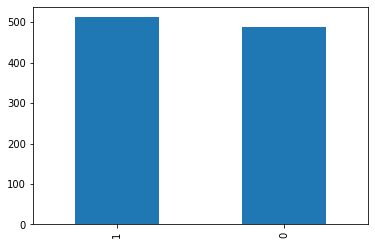

In [726]:
credit['Approved'].value_counts().plot(kind = 'bar')

In [727]:
x=credit.drop(['Approved'],axis=1).values
y=credit['Approved'].values
print (x)
print (y)

[[1234561175         27   26818984 ...     856297          0  996488929]
 [1234561810         53   30495905 ...     599572   17479146  548712837]
 [1234561778         52   20001314 ...    2743516          0 4421862018]
 ...
 [1234561393         42   34947944 ...    3607066          0 2561129741]
 [1234561007         44   10182924 ...          0          0  579812019]
 [1234561955         35   21981728 ...          0          0 5536000121]]
[0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 

In [728]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [729]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [730]:
pca = PCA(n_components =None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
hasil_variance = pca.explained_variance_ratio_
print(hasil_variance)

[0.21237747 0.12372511 0.11984198 0.11339186 0.10996277 0.10508018
 0.10220156 0.09856724 0.01485183]


In [731]:
pca = PCA(n_components = 9)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
hasil_variance2 = pca.explained_variance_ratio_
print(hasil_variance2)

[0.21237747 0.12372511 0.11984198 0.11339186 0.10996277 0.10508018
 0.10220156 0.09856724 0.01485183]


In [732]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [733]:
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

Intercept: 0.5164520743919886
Coefficients: [ 0.22664464  0.00426741 -0.09513977  0.14324923 -0.02868982 -0.27448643
 -0.16298396  0.09250401 -0.09318268]


In [734]:
y_pred = regressor.predict(x_test)
y_pred

array([ 9.91991235e-01, -4.83893692e-03,  7.51650332e-02,  5.12898642e-02,
        1.14727067e-03,  1.01286433e+00,  1.15349014e+00, -4.69338868e-04,
        9.33629222e-01,  1.11920381e+00, -2.04476665e-02,  1.22587393e+00,
        9.54793980e-01,  9.42076451e-03, -2.56967274e-03,  5.87384279e-02,
        1.39547488e-01,  8.89380096e-01,  1.06376087e+00,  9.48108334e-01,
        9.21094319e-03,  9.47352771e-01,  1.12290142e+00,  7.80355167e-01,
        8.94547210e-01, -1.99661422e-05,  4.12246025e-02,  7.29732712e-02,
        9.86434376e-01,  9.91282034e-01,  9.87414910e-02,  4.34727231e-02,
        1.09492506e+00,  8.04802507e-01,  1.22487390e+00,  1.20691566e+00,
        1.12161592e+00,  1.17376522e+00, -8.52546993e-03,  8.24110286e-03,
        1.34203987e-01, -8.75934073e-03, -3.07464260e-02,  1.14347889e+00,
       -7.03940936e-03,  1.12370191e+00,  1.19767083e+00,  8.88056521e-03,
       -3.37216892e-02,  8.95446121e-01,  9.16738686e-03,  1.24715046e+00,
        7.87203371e-01,  

In [735]:
score=r2_score(y_test,y_pred)
score

0.9455138859384085